In [1]:
import pandas as pd 
import seaborn as sns
import re
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим,-что-эффективность-обогащения-рассчитана-правильно" data-toc-modified-id="Проверим,-что-эффективность-обогащения-рассчитана-правильно-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверим, что эффективность обогащения рассчитана правильно</a></span></li><li><span><a href="#Проанализирем-признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Проанализирем-признаки,-недоступные-в-тестовой-выборке-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проанализирем признаки, недоступные в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Изучим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах" data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишим-функцию-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Напишим-функцию-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишим функцию для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучим-разные-модели-и-выберем-лучшую" data-toc-modified-id="Обучим-разные-модели-и-выберем-лучшую-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим разные модели и выберем лучшую</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

Откроем и изучим данные

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv', sep=',')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv', sep=',')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv', sep=',')    
pd.options.display.max_columns = None

In [3]:
display(df_train.info())
display(df_train.sample(5))
display(df_train.describe())
display('Дубликатов:',df_train.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

None

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
6352,2017-02-04 15:59:59,7.561775,11.277356,14.772874,41.885446,70.755311,10.788319,3.853571,8.231798,3.543876,160.067362,10.015763,6.51,1.602668,10.220291,11.744072,13.139299,29.568574,16.778879,3.857717,7.478537,4.858188,1644.758729,-500.082756,1801.948584,-500.177607,1804.129346,-499.194723,1635.234142,-500.007422,48031.420630,3039.425854,3039.093473,2.149829,10.193766,4.678935,357.950283,44.439311,34.638802,10.058911,11.001285,5.300527,11.000892,5.299098,13.951026,9.273229,34.417758,22.662452,90.461826,5.747328,0.324425,13.062704,1.603127,1500.144948,-300.079721,1199.888830,-499.929568,1199.590882,-500.296273,1090.594428,-499.905875,999.084319,-499.826744,899.874846,-499.783030,13.744868,5.105764,5.834321,3.296588,33.905799,-500.032512,30.040699,-499.842454,34.961928,-500.082540,23.981153,-499.939742,25.011146,-499.791423,22.945078,-500.264202,23.008423,-499.432909,20.009943,-499.935616,25.011898,-599.474714
9195,2017-06-03 02:59:59,4.457322,10.459731,7.873476,45.348879,39.136543,9.360910,4.344750,11.333981,6.019339,103.617622,14.007410,7.29,0.985613,7

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16502.000000,16224.000000,16778.000000,16777.000000,16761.000000,16579.000000,16777.000000,16820.000000,16827.000000,16820.000000,16833.000000,16822.000000,16833.000000,16821.000000,16833.000000,1.683300e+04,1.683300e+04,1.683300e+04,15618.000000,16778.000000,16632.000000,16347.000000,16443.000000,16568.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000,16778.000000,16778.000000,16698.000000,16778.000000,14287.000000,14610.000000,16778.000000,14611.000000,14611.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16814.000000,16802.000000,16809.000000,16257.000000,16809.000000,16802.000000,16802.000000,16776.000000,16764.000000,14874.000000,16778.000000,16497.000000,16751.000000,16705.000000,16748.000000,16763.000000,16747.000000,16752.000000,16750.000000,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775

'Дубликатов:'

0

In [4]:
display(df_test.info())
display(df_test.sample(5))
display(df_test.describe())
display('Дубликатов:',df_test.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

None

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
901,2016-10-08 13:59:59,170.679223,7.078965,7.30,1.024006,1546.805036,-500.686356,1549.296587,-499.944296,1548.030965,-499.570118,1549.235226,-500.014888,10.794302,3.713648,466.040068,42.247905,37.233959,10.080408,12.003826,6.694395,12.002955,6.702606,1000.868819,-500.289982,1253.296206,-399.937486,1495.496210,-399.861690,1301.932441,-399.398688,1099.206719,-399.482987,997.893271,-398.768483,24.942288,-499.826783,17.963013,-500.068163,24.883916,-500.561724,19.992049,-500.317509,11.993692,-499.509098,11.907637,-499.979670,9.602973,-499.600353,6.996343,-499.773199,18.000248,-500.200935
2232,2016-12-03 00:59:59,226.698181,9.013109,7.40,1.321346,1501.412887,-499.918982,1501.935318,-500.375857,1504.186822,-500.394557,1500.348696,-499.960799,11.065122,4.385802,487.348540,46.775765,38.023758,10.537910,14.499848,6.699011,14.500142,6.700977,998.571587,-500.129642,1454.085782,-499.675333,1450.605015,-500.195225,1401.370665,-499.940909,1099.667377,-499.855308,1000.471364,-500.779191,26.872082,-499.882690,23.132319,-499.635204,29.960770,-499.925757,27.011472,-499.811034,17.996997,-499.904721,16.040350,-499.949128,16.053300,-500.277056,11.978671,-500.168603,21.995705,-501.280253
5045,2017-11-28 05:59:59,232.549874,12.010009,9.63,1.403445,1601.263126,-495.862507,1598.272486,-511.299178,1600.130631,-501.065465,1600.798586,-499.693055,11.328069,5.992507,570.215159,65.291506,40.507095,11.285928,17.109762,7.997682,17.107832,7.998682,1199.723593,-399.957040,999.404748,-500.051370,997.174373,-499.988442,802.183513,-499.951455,799.929097,-500.446516,699.904831,-501.051506,27.973273,-499.714530,24.115836,-499.917882,24.957156,-500.092316,19.982560,-499.920842,17.012365,-499.923983,15.003986,-500.150221,11.090965,-498.860562,8.999980,-500.013345,15.987182,-497.468121
4655,2017-11-11 23:59:59,144.935068,10.010966,6.72,0.857722,1601.241080,-499.714693,1596.605934,-489.215390,1597.258211,-509.796070,1600.256786,-499.884557,9.557720,3.627753,501.035016,66.865460,39.979558,8.920813,11.914850,6.961266,11.917717,6.961458,1200.024962,-299.910737,1200.222571,-499.197301,1198.014356,-499.734086,1096.443338,-499.83370

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5816.000000,5834.000000,5789.000000,5840.000000,5599.000000,5733.000000,5801.000000,5503.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5836.000000,5840.000000,5833.000000,5840.000000,5822.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,1486.398557,-510.723606,8.736170,3.552722,458.485472,55.937535,35.105834,8.700930,13.439933,6.169553,13.056047,6.423566,1016.294703,-404.977728,1270.598553,-482.154567,1253.495045,-480.945868,1169.675564,-482.152253,1018.386311,-476.551547,962.005375,-477.795380,25.479808,-513.714941,21.083475,-512.325717,24.345831,-519.417733,20.068079,-515.028316,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,313.725248,65.417633,2.985805,1.326113,155.958272,22.724254,10.793249,2.803046,3.997715,1.673606,4.533948,1.120371,226.494775,100.953782,285.247715,55.399631,290.703157,53.759053,285.407244,54.967985,231.675756,67.002595,220.862435,68.342305,5.450424,62.448366,5.940017,63.376776,7.950733,73.968109,7.644391,60.457838,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,0.000000,-799.838846,0.000000,0.000000,0.002986,0.046369,0.000000,0.000000,0.000154,0.000052,0.000014,0.000055,-0.123194,-657.949759,-0.821921,-650.349159,-0.282087,-650.000000,-1.047388,-648.390665,-2.076798,-650.152533,-2.593390,-650.034631,0.000000,-799.608557,0.000000,-798.467243,0.000000,-799.7

'Дубликатов:'

0

In [5]:
display(df_full.info())
display(df_full.sample(5))
display(df_full.describe())
display('Дубликатов:',df_full.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

None

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
18889,2018-03-12 00:59:59,5.568733,9.465388,8.902749,44.991504,77.510248,11.342220,1.730528,9.409501,2.571758,168.456773,8.000778,7.25,1.114306,8.286326,8.767795,10.180768,35.409662,20.851618,4.827976,6.380057,3.324954,1698.113988,-500.043522,1695.992283,-499.773086,1699.370046,-500.552485,1699.349213,-500.147604,38808.118815,2490.843619,2490.669784,2.793795,9.837655,3.419444,593.450588,79.429362,38.640539,9.553225,12.365196,7.000337,12.363663,7.001853,12.198901,6.412073,29.958308,21.050449,91.723405,5.599634,0.346470,21.135657,1.354519,1397.475352,-299.962616,1198.110263,-500.412253,1098.285611,-499.916215,1044.910697,-501.125148,1049.194178,-499.943351,999.247862,-501.026573,18.663791,7.566459,1.260541,4.601343,34.820913,-500.073950,26.972895,-500.075259,32.980194,-500.119073,19.000264,-499.969474,23.008477,-499.267095,14.942108,-499.952214,18.002652,-500.104305,12.029574,-500.194191,11.993496,-500.275109
18977,2018-03-15 16:59:59,1.341642,2.846589,2.150383,11.121003,69.303832,1.707843,0.338255,1.637903,0.421782,185.668516,10.958896,7.33,0.707333,2.14723

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,21170.000000,22716.000000,21565.000000,22618.000000,22268.000000,21918.000000,22618.000000,22614.000000,22594.000000,22365.000000,22617.000000,22660.000000,22667.000000,22660.000000,22673.000000,22662.000000,22673.000000,22661.000000,22673.000000,2.267200e+04,2.267200e+04,2.267200e+04,21089.000000,22618.000000,22472.000000,22163.000000,22277.000000,22357.000000,22617.000000,21415.000000,22247.000000,22038.000000,20459.000000,22618.000000,22618.000000,22526.000000,22618.000000,19597.000000,19979.000000,22618.000000,19980.000000,19980.000000,22646.000000,22647.000000,22646.000000,22647.000000,22646.000000,22654.000000,22641.000000,22649.000000,22096.000000,22649.000000,22641.000000,22642.000000,22616.000000,22600.000000,20501.000000,22618.000000,22333.000000,22591.000000,22538.000000,22588.000000,22585.000000,22587.000000,22592.000000,22590.000000,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615

'Дубликатов:'

0

В наших датасетах есть пропуски, дубликаты не обнаружились. У нас есть два целевых признака это:
* rougher.output.recovery - выход после глубокой обратотки 
* final.output.recovery - выход после финальной обработки

### Проверим, что эффективность обогащения рассчитана правильно

Для расчета эффективности будем использовать данную формулу:
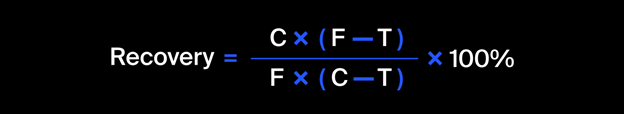
где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

In [6]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']
df_train['rougher.output.recovery.check'] = ((C*(F-T))/(F*(C-T))) * 100
display(df_train['rougher.output.recovery.check'].median())

85.21532695253761

Проверим полученное нами значение recovery и значение, которое есть в нашем датасете и удалим пропуски

In [7]:
ROR  = df_train.dropna()['rougher.output.recovery']
ROR_CHECK = df_train.dropna()['rougher.output.recovery.check']
MAE = mean_absolute_error(ROR,ROR_CHECK)
display(MAE)

9.555596961987514e-15

Значение средней абсолютной ошибки невелико, поэтому мы можем сделать вывод, что данным которые мы получили можно доверя. Это хорошо, поэтому мы удалим столбец с нашими рассчетами

In [8]:
df_train = df_train.drop('rougher.output.recovery.check', axis = 1)

### Проанализирем признаки, недоступные в тестовой выборке

In [9]:
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

None

In [10]:
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

None

Обучающий датасет содержит на 34 столбца больше чем тестовый. Эти 34 столба в назнании все имеют параметры сырьея (output), эти данные будут отсутствовать в реальных датасетах для анализа, поэтому мы может их удалить из обучающих данных, они будут мешать нашей моделе

In [11]:
test_columns = pd.Series(df_test.columns)
delete = df_train.drop(test_columns, axis = 1)
display(delete.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.output.concentrate_ag                 16778 non-null float64
primary_cleaner.output.concentrate_pb                 16502 non-null float64
primary_cleaner.output.concentrate_sol      

None

### Предобработка данных

Мы выяснили, что у нас в обучающем датасете есть лишние столбцы, удалим их

In [12]:
useless_columns = pd.Series(delete.columns)
df_train = df_train.drop(useless_columns, axis = 1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 53 columns):
date                                          16860 non-null object
primary_cleaner.input.sulfate                 15553 non-null float64
primary_cleaner.input.depressant              15598 non-null float64
primary_cleaner.input.feed_size               16860 non-null float64
primary_cleaner.input.xanthate                15875 non-null float64
primary_cleaner.state.floatbank8_a_air        16820 non-null float64
primary_cleaner.state.floatbank8_a_level      16827 non-null float64
primary_cleaner.state.floatbank8_b_air        16820 non-null float64
primary_cleaner.state.floatbank8_b_level      16833 non-null float64
primary_cleaner.state.floatbank8_c_air        16822 non-null float64
primary_cleaner.state.floatbank8_c_level      16833 non-null float64
primary_cleaner.state.floatbank8_d_air        16821 non-null float64
primary_cleaner.state.floatbank8_d_level      16833 non-null flo

In [13]:
df_train.isna().mean()

date                                          0.000000
primary_cleaner.input.sulfate                 0.077521
primary_cleaner.input.depressant              0.074852
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.058422
primary_cleaner.state.floatbank8_a_air        0.002372
primary_cleaner.state.floatbank8_a_level      0.001957
primary_cleaner.state.floatbank8_b_air        0.002372
primary_cleaner.state.floatbank8_b_level      0.001601
primary_cleaner.state.floatbank8_c_air        0.002254
primary_cleaner.state.floatbank8_c_level      0.001601
primary_cleaner.state.floatbank8_d_air        0.002313
primary_cleaner.state.floatbank8_d_level      0.001601
rougher.input.feed_ag                         0.004864
rougher.input.feed_pb                         0.013523
rougher.input.feed_rate                       0.030427
rougher.input.feed_size                       0.024733
rougher.input.feed_sol                        0.017319
rougher.in

In [14]:
df_test.isna().mean()

date                                          0.000000
primary_cleaner.input.sulfate                 0.051571
primary_cleaner.input.depressant              0.048497
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.028347
primary_cleaner.state.floatbank8_a_air        0.002732
primary_cleaner.state.floatbank8_a_level      0.002732
primary_cleaner.state.floatbank8_b_air        0.002732
primary_cleaner.state.floatbank8_b_level      0.002732
primary_cleaner.state.floatbank8_c_air        0.002732
primary_cleaner.state.floatbank8_c_level      0.002732
primary_cleaner.state.floatbank8_d_air        0.002732
primary_cleaner.state.floatbank8_d_level      0.002732
rougher.input.feed_ag                         0.002732
rougher.input.feed_pb                         0.002732
rougher.input.feed_rate                       0.006831
rougher.input.feed_size                       0.003757
rougher.input.feed_sol                        0.011441
rougher.in

Мы проверили значения эффективности обогащения, данным можно доверять. Также мы выявили, что в тестовой выборке на 34 столбца меньше чем в обучающей и так как при работе модели с реальными данными этих столбцов не будем мы их просто удалили. Также у нас есть не большой процент пропусков, что с ними делать пока не ясно, посмотрим, что будет далее

## Анализ данных

### Изучим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [15]:
mtc = np.array([['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'],
                      ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'],
                      ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
                    )

In [16]:
def plot(met, label):
    """
    принимает: met - название столбцов,передаем сюда нужную строку в массиве с названием столбцов
               label - название графика
       выдаёт: violin plot - концентрации металов на разных этапах обработки руды
             
     описание: Функция выводит визуализирует данные концентрации металлов на разных этапах обработки руды.
    """
    sns.set()
    f, axes = plt.subplots(1, 1, figsize=(18, 6))
    axes.set_title(label, fontsize=18)
    axes.set_ylabel('концентрация', fontsize=15)
    sns.violinplot(data=df_full[met])

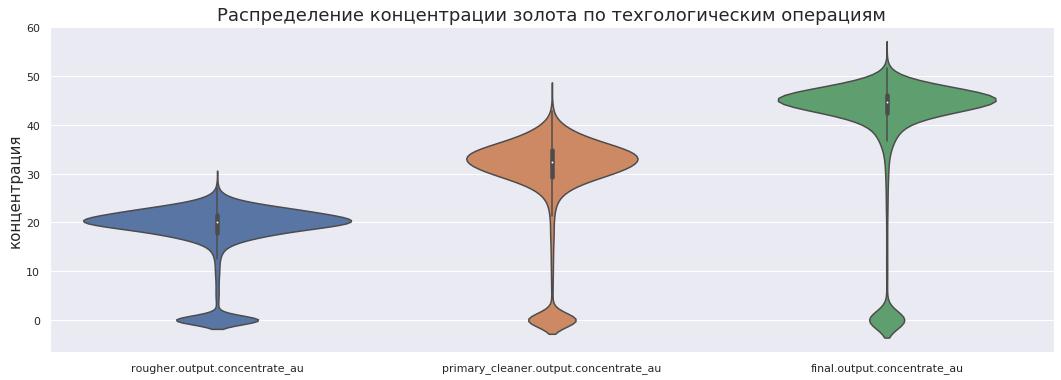

In [17]:
plot(mtc[0],'Распределение концентрации золота по техгологическим операциям')

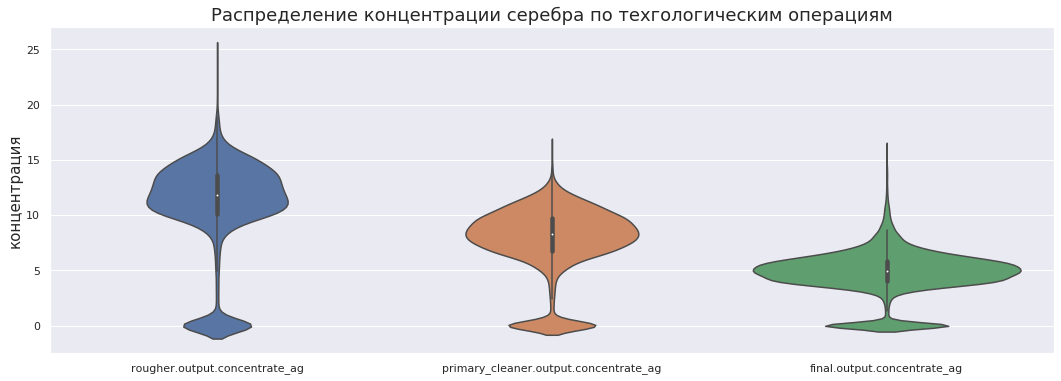

In [18]:
plot(mtc[1],'Распределение концентрации серебра по техгологическим операциям')

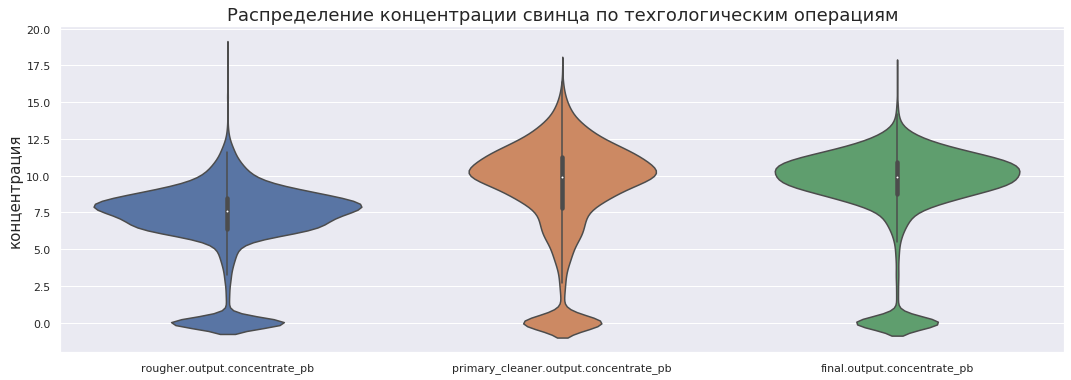

In [19]:
plot(mtc[2],'Распределение концентрации свинца по техгологическим операциям')

Из графиков мы можем сделать слеющие выводы:
* концентрация золота золота увеличивает от этапов обработки
* концентрация серебра уменьшается от этапов обработки
* концентрация свинца немного увеличивается от этапов обработки, но потом практически не меняется

###  Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

In [20]:
test_granule_size = df_test['rougher.input.feed_size'].groupby(df_test.index).agg('mean')
train_granule_size = df_train['rougher.input.feed_size'].groupby(df_train.index).agg('mean')

Мы сгруппировали данные по размером гранул для обучающей и тестовой выборки, посмотрим как они распределены, для этого постоим график распределения

Text(0.5, 1.0, 'Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках')

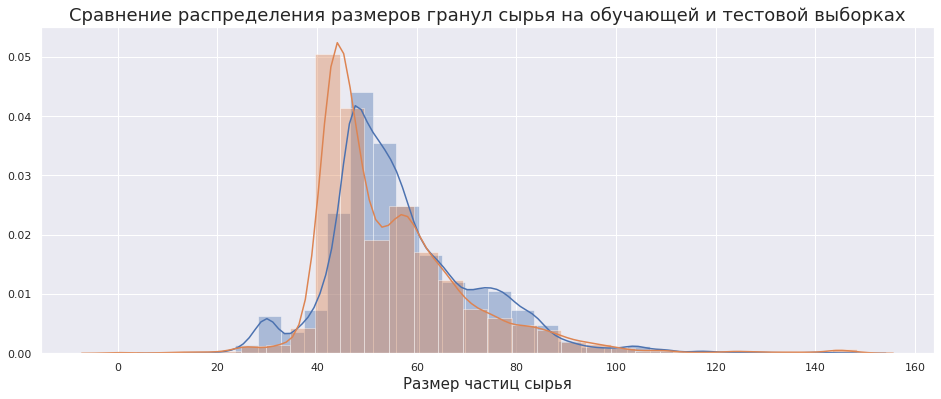

In [21]:
ff, axes = plt.subplots(1, 1, figsize=(16, 6))
sns.distplot(train_granule_size.loc[train_granule_size < 150], bins=30)
sns.distplot(test_granule_size.loc[test_granule_size < 150], bins=30)
axes.set_xlabel('Размер частиц сырья', fontsize=15)
axes.set_title('Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках', fontsize=18)

Распределение размера гранул у тестовой и обучающей выборки отличаются не сильно, поэтому данным мы можем доверять. Смещение не критичное

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [22]:
df_full['feed_sum'] = df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'] +\
            df_full['rougher.input.feed_sol'] + df_full['rougher.input.feed_au']
df_full['rougher_sum'] = df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb'] +\
           df_full['rougher.output.concentrate_sol'] + df_full['rougher.output.concentrate_au']
df_full['final_sum'] = df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'] +\
            df_full['final.output.concentrate_sol'] + df_full['final.output.concentrate_au']

In [23]:
sum_sub = ['feed_sum', 'rougher_sum', 'final_sum']

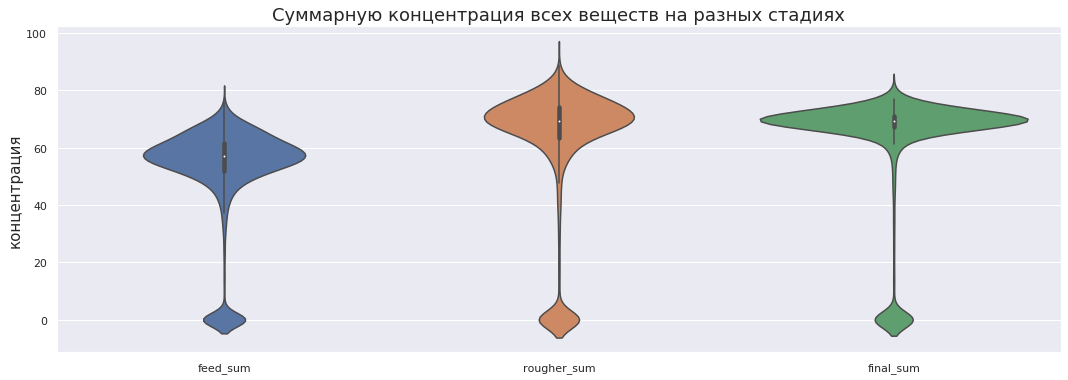

In [24]:
plot(sum_sub,'Cуммарную концентрация всех веществ на разных стадиях')

Из графика мы видим, что у нас есть явные выбросы в нуле на всех стадиях. На всех стадия мы удалим данные, которые находятся ниже значения 30. 

In [25]:
df_check = df_full.loc[(df_full['feed_sum'] > 30)&(df_full['rougher_sum'] > 30)&\
                      (df_full['final_sum'] > 30)]

df_fin = df_check.drop(sum_sub, axis = 1)

df = df_fin.drop(useless_columns, axis = 1)
df['rougher.output.recovery'] = df_check['rougher.output.recovery']
df['final.output.recovery'] = df_check['final.output.recovery']
display('Размер получившиейся таблицы:')
display(df.shape)

'Размер получившиейся таблицы:'

(18943, 55)

## Модель

### Напишим функцию для вычисления итоговой sMAPE.

Функция для вычисления sMAPE выглядит следующим образом:
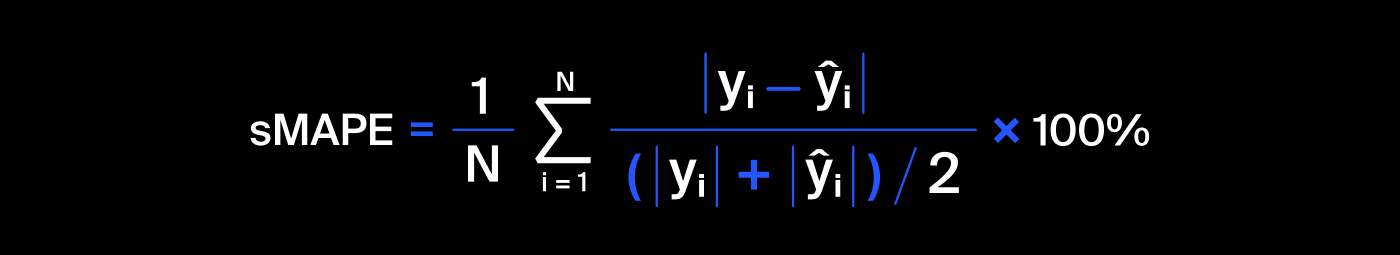

In [26]:
def sMAPE(y_true,y_pred):
    error = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return error

Функция для вычисления итогового sMAPE выглядит вот так:
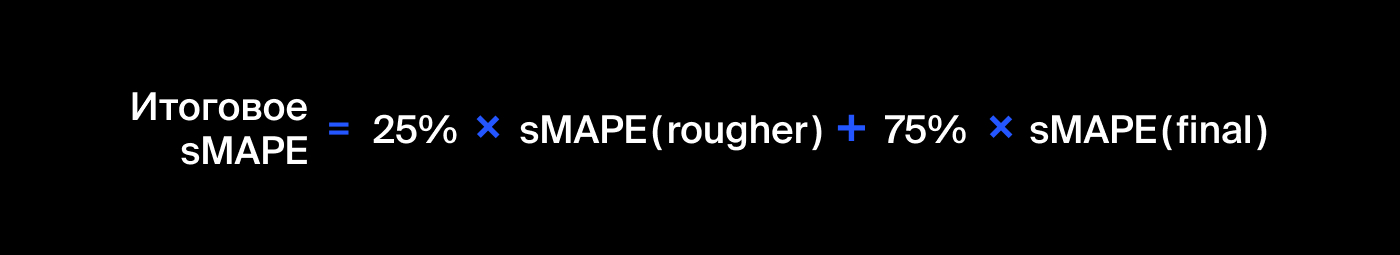

In [27]:
def final_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

### Обучим разные модели и выберем лучшую

In [28]:
display('Кол-во пропусков')
df_train.isna().sum().sum()

'Кол-во пропусков'

12668

In [29]:
good_index = df.index
bad_index = df_train.isna().index
bad_index_test = df_test.isna().index

In [30]:
df_train = df_train.query('index in @good_index')
df_test = df_test.query('index in @good_index')

Мы отсекли данные по хорошим индексам, можно попробовать восстановить данные по ним из полного датасета

In [31]:
df_train = df_train.fillna(df.query('index in @bad_index'))
df_test = df_test.fillna(df.query('index in @bad_index_test'))
display('Кол-во пропусков в тренировочных даных')
display(df_train.isna().sum().sum())
display('Кол-во пропусков в тестовых данных')
df_test.isna().sum().sum()

'Кол-во пропусков в тренировочных даных'

245

'Кол-во пропусков в тестовых данных'

0

Ура! пропусков не много, можем их удалить, также добавим отсутствующие столбцы

In [32]:
df_train['rougher.output.recovery'] = df['rougher.output.recovery']
df_train['final.output.recovery'] = df['final.output.recovery']
df_test['rougher.output.recovery'] = df['rougher.output.recovery']
df_test['final.output.recovery'] = df['final.output.recovery']


In [33]:
train = df_train.dropna()
display('Кол-во пропусков в тренировочных данных')
display(train.isna().sum().sum())
test = df_test.dropna()
display('Кол-во пропусков в тестовых данных')
display(train.isna().sum().sum())

'Кол-во пропусков в тренировочных данных'

0

'Кол-во пропусков в тестовых данных'

0

In [34]:
display('Размер оосновной выборки:', train.shape)
display('Размер тестовой выборки:', test.shape)

'Размер оосновной выборки:'

(13779, 55)

'Размер тестовой выборки:'

(4582, 55)

In [35]:
rougher_columns = []
pattern = re.compile('rougher')
print('Признаки для предсказания эффективности обогащения на этапе флотации:')
for column in list(train.columns):
    if re.match(pattern, column):
        rougher_columns.append(column)
        print(' - ', column)

Признаки для предсказания эффективности обогащения на этапе флотации:
 -  rougher.input.feed_ag
 -  rougher.input.feed_pb
 -  rougher.input.feed_rate
 -  rougher.input.feed_size
 -  rougher.input.feed_sol
 -  rougher.input.feed_au
 -  rougher.input.floatbank10_sulfate
 -  rougher.input.floatbank10_xanthate
 -  rougher.input.floatbank11_sulfate
 -  rougher.input.floatbank11_xanthate
 -  rougher.state.floatbank10_a_air
 -  rougher.state.floatbank10_a_level
 -  rougher.state.floatbank10_b_air
 -  rougher.state.floatbank10_b_level
 -  rougher.state.floatbank10_c_air
 -  rougher.state.floatbank10_c_level
 -  rougher.state.floatbank10_d_air
 -  rougher.state.floatbank10_d_level
 -  rougher.state.floatbank10_e_air
 -  rougher.state.floatbank10_e_level
 -  rougher.state.floatbank10_f_air
 -  rougher.state.floatbank10_f_level
 -  rougher.output.recovery


Для вычисления rougher.output.recovery у нас будут только пристанаки с этапа флотации, поэтому мы выделили их их общего датасета

In [36]:
model_F = make_pipeline(StandardScaler(),RandomForestRegressor())
model_T = make_pipeline(StandardScaler(),DecisionTreeRegressor())

Запишем нашу метрику качества

In [37]:
custom_score = make_scorer(sMAPE, greater_is_better=False)

Запишем параметры для перебора наших моделей

In [38]:
params_RF = {"randomforestregressor__n_estimators":[5,100],
             "randomforestregressor__max_depth":[1,10]}
params_DT= {"decisiontreeregressor__max_depth":[1,10]}

Разделим данные на целевой признак и признаки модели определяющей rougher.output.recovery:

In [39]:
routher = train[rougher_columns]
features_r = routher.drop(['rougher.output.recovery'], axis=1) 
target_r = routher['rougher.output.recovery']

Разделим данные на целевой признак и признаки модели определяющей final.output.recovery:

In [40]:
final = train.drop(['date'], axis=1)
features_f = final.drop(['final.output.recovery'], axis=1) 
target_f = final['final.output.recovery']

In [41]:
def stage(features, target, model, param_grid, label):
    grid = GridSearchCV(model,param_grid = param_grid,scoring = custom_score)
    grid.fit(features,target)
    print('\033[1m' + label)
    print ('\033[0m')
    print(('sMAPE: {:.2f}%'.format(abs(grid.best_score_))))
    print(('Параметры модели:', grid.best_estimator_ ))    
    return abs(grid.best_score_)

In [42]:
sMAPE_r1 = stage(features_r, target_r, model_F, params_RF, 'Сдучайный лес для этапа флотация')

Сдучайный лес для этапа флотация

sMAPE: 6.77%
('Параметры модели:', Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=1, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=5, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False))


In [43]:
sMAPE_r2 = stage(features_r, target_r, model_T, params_DT, 'Дерево решений для этапа флотация')

Дерево решений для этапа флотация

sMAPE: 6.79%
('Параметры модели:', Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(criterion='mse', max_depth=1,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=None,
                                       splitter='best'))],
         verbose=False))


In [44]:
sMAPE_f1 = stage(features_f, target_f, model_F, params_RF, 'Случайный лес для финального этапа')

Случайный лес для финального этапа

sMAPE: 7.75%
('Параметры модели:', Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=1, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False))


In [45]:
sMAPE_r2 = stage(features_f, target_f, model_T, params_DT, 'Дерево решений для финального этапа')

Дерево решений для финального этапа

sMAPE: 7.88%
('Параметры модели:', Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(criterion='mse', max_depth=1,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=None,
                                       splitter='best'))],
         verbose=False))


Лучшей моделью мы выбираем случайный лес, показатели этой модели лучше чем у модели дерево решений.

Проверим эту модель на тестовой выбоке:
* Подготовим данные для этапа флотации
* Подготовим данные для финального этапа

In [46]:
trouther = test[rougher_columns]
test_features_r = trouther.drop(['rougher.output.recovery'], axis=1) 
test_target_r = trouther['rougher.output.recovery']

In [47]:
tfinal = test.drop(['date'], axis=1)
test_features_f = tfinal.drop(['final.output.recovery'], axis=1) 
test_target_f = tfinal['final.output.recovery']

In [48]:
sMAPE_r = stage(test_features_r, test_target_r, model_F, params_RF, 'Сдучайный лес для этапа флотация')

Сдучайный лес для этапа флотация

sMAPE: 9.12%
('Параметры модели:', Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=1, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=5, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False))


In [49]:
sMAPE_f = stage(test_features_f, test_target_f, model_F, params_RF, 'Случайный лес для финального этапа')

Случайный лес для финального этапа

sMAPE: 6.76%
('Параметры модели:', Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=10, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False))


Посчитаем итоговое sMAPE:

In [50]:
display(('Финальное sMAPE: {:.2f}%'.format(final_sMAPE(sMAPE_r,sMAPE_f))))

'Финальное sMAPE: 7.35%'

Обучим константную модель для проверки адекватности нашей модели и посчитаем финальное sMAPE:

In [51]:
model_r = DummyRegressor(strategy="median") # Обозначаем модели
model_f = DummyRegressor(strategy="median")
model_r.fit(features_r, target_r) # Обучаем модели
model_f.fit(features_f, target_f)
pmr = model_r.predict(test_features_r) # Сохраняем предсказания
pmf = model_f.predict(test_features_f)

display(('Финальное sMAPE константной модели: {:.2f}%'.format(final_sMAPE(sMAPE(test_target_r,pmr),sMAPE(test_target_f,pmf)))))

'Финальное sMAPE константной модели: 9.07%'

## Вывод

Лучшем моделью мы выбрали **случайный лес**, она показала лучшие результаты на обеих обучающих выборках: этап флотации sMAPE 6,77%, финальный этап sMAPE 7.74%. На тестовом датасете результаты: этап флотации: sMAPE 9,13%, финальный этап sMAPE 6,65%.
Итоговое значени SMAPE 7.27%. Модель прошла проверку ошибка обученой модели меньше чем у константной. 🤘
